In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
%matplotlib inline

In [2]:
files = glob.glob("imagenes/*.png")
n_images = len(files)

In [3]:
imagenes = []
for i, f in enumerate(files):
    d = plt.imread(f)
    imagenes.append(d.flatten())
    
X = np.ones((len(imagenes), len(imagenes[0])))
for i,im in enumerate(imagenes):
    X[i,:] = im[:]

In [4]:
n_clusters = 20
inertia  = np.ones(n_clusters)
for n in range(n_clusters):
    k_means = sklearn.cluster.KMeans(n_clusters=n+1)
    k_means.fit(X)
    inertia[n] = k_means.inertia_

Text(0,0.5,'Inercia')

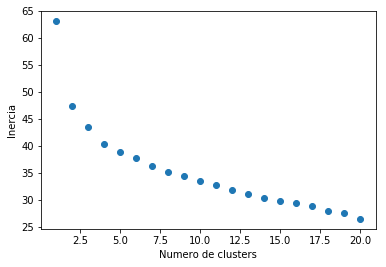

In [5]:
plt.scatter(np.arange(n_clusters)+1, inertia/(inertia[-2]-inertia[-1]))
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")

In [6]:
n_clusters = 4
k_means = sklearn.cluster.KMeans(n_init=50, n_clusters=n_clusters)
k_means.fit(X)
cluster = k_means.predict(X)

distances = np.ones((n_images, n_clusters))*1000

# Aqui voy a calcular en realidad las distancias medidas por el producto punto.
# Eso va a medir la similitud global del las imagenes
for i in range(n_images):
    for j in range(n_clusters):
        if cluster[i] == j:
            distances[i, j] = np.sqrt(np.sum(X[i,:]*k_means.cluster_centers_[j,:]))        

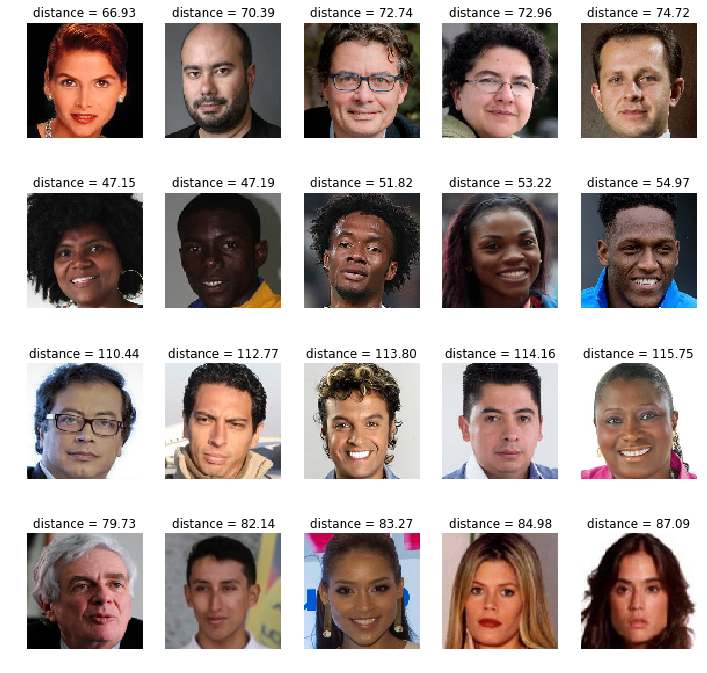

In [7]:
plt.figure(figsize=(12,12))
for i in range(n_clusters):
    ii = np.argsort(distances[:,i])
    n_seq = 5
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(imagenes[ind].reshape(100,100,3))
        plt.title("distance = {:.2f}".format(distances[ind,i]))
        plt.axis('off')